In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = uproot.open("output_ggHH_SM_minMassDist.root")['bbbbTree']
branches = f.keys()
#print(branches)
df = f.arrays(branches,library="pd")
nEvents = len(df)

no breg:
-4.4040956
-11.364475
with breg:
1.6781921
-2.8882883


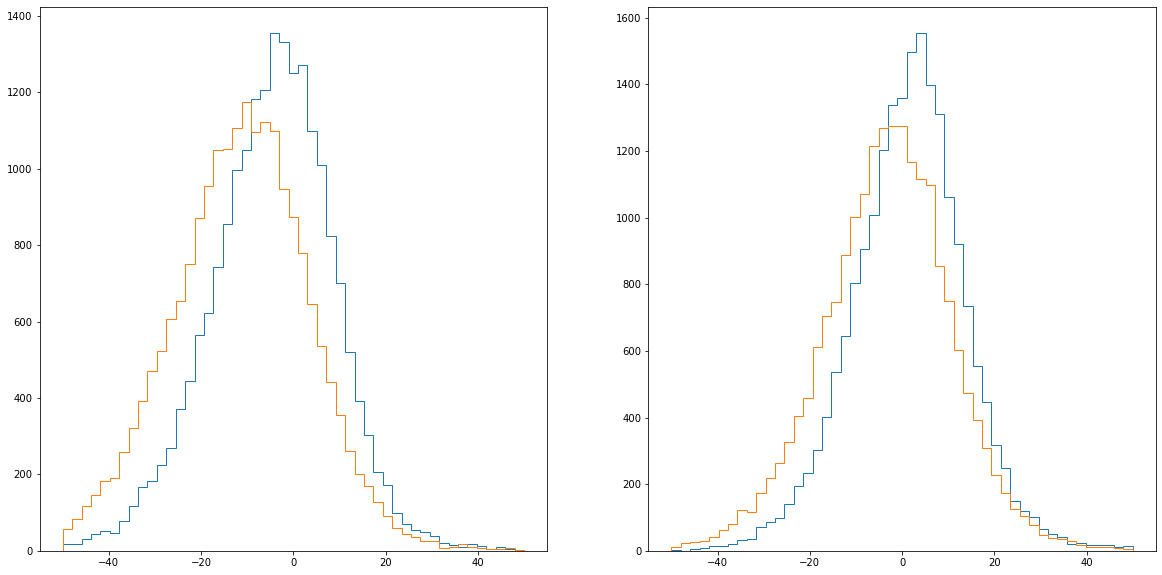

In [3]:
tru = df["allJets_truMatch"] == True

h1_m_truMatch = df[tru]["truMatch_H1_m"].values
h2_m_truMatch = df[tru]["truMatch_H2_m"].values
h1_m_truMatch_breg = df[tru]["truMatch_H1_m_breg"].values
h2_m_truMatch_breg = df[tru]["truMatch_H2_m_breg"].values
h1_m_gen = df[tru]["gen_H1_m"].values
h2_m_gen = df[tru]["gen_H2_m"].values

dm1 = h1_m_truMatch - h1_m_gen
dm2 = h2_m_truMatch - h2_m_gen
dm1_breg = h1_m_truMatch_breg - h1_m_gen
dm2_breg = h2_m_truMatch_breg - h2_m_gen

plt.figure(1,(20,10))
plt.subplot(121)
h1 = plt.hist(dm1,bins=np.linspace(-50,50),histtype='step')
h2 = plt.hist(dm2,bins=np.linspace(-50,50),histtype='step')
plt.subplot(122)
h3 = plt.hist(dm1_breg,bins=np.linspace(-50,50),histtype='step')
h4 = plt.hist(dm2_breg,bins=np.linspace(-50,50),histtype='step')

print("no breg:")
print(dm1.mean())
print(dm2.mean())
print("with breg:")
print(dm1_breg.mean())
print(dm2_breg.mean())

Peak is at m_H1 = 129.0000, m_H2 = 121.0000


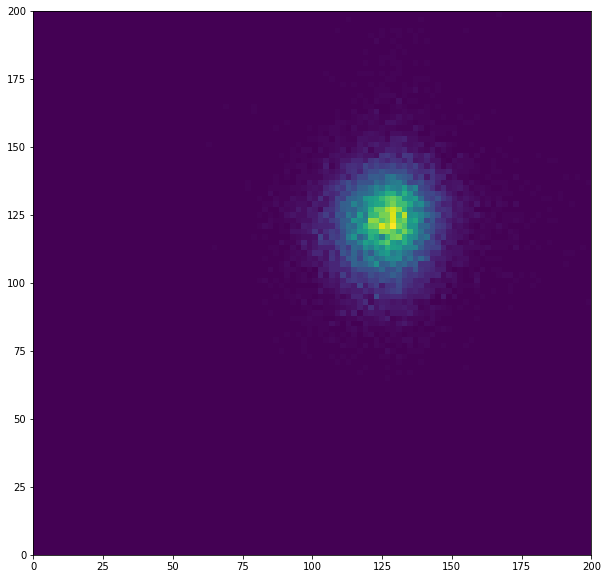

In [5]:
bins = np.arange(0,202,step=2)
plt.figure(figsize=(10,10))
h12 = plt.hist2d(h1_m_truMatch_breg,h2_m_truMatch_breg,bins=bins)
max_ind = np.unravel_index(np.argmax(h12[0]),h12[0].shape)
x = (h12[1][:-1] + h12[1][1:])/2
y = (h12[2][:-1] + h12[2][1:])/2
print("Peak is at m_H1 = {0:.4f}, m_H2 = {1:.4f}".format(x[max_ind[0]],y[max_ind[1]]))
mH1_0 = x[max_ind[0]]
mH2_0 = y[max_ind[1]]

In [6]:
print("means with b-reg")
print(h1_m_truMatch_breg.mean())
print(h2_m_truMatch_breg.mean())
print("medians with b-reg")
print(np.median(h1_m_truMatch_breg))
print(np.median(h2_m_truMatch_breg))

means with b-reg
126.678185
122.11171
medians with b-reg
126.86606
122.2408


In [65]:
len(h1_m_truMatch)

20198

In [71]:
16785/20198

0.8310228735518368